<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

# CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

# Import libraries

In [4]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import keras
# conda install -c conda-forge keras
import tensorflow
from tensorflow import keras
from keras.datasets import cifar10
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import TensorBoard

In [ ]:
# insert code here

In [ ]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
# from keras.callbacks import TensorBoard

# Load data
Use the **Keras**' load method.

In [5]:
# insert code here
(X_train_all, t_train_all), (X_test_all, t_test_all) = cifar10.load_data()

170500096/170498071 [==============================] - 15s 0us/step


In [6]:
size = 50000
X_train = X_train_all[:size,:,:,:]
t_train = t_train_all[0:size,:]
X_test = X_test_all[0:size,:,:,:]
t_test = t_test_all[0:size,:]

In [7]:
classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')

## Check some data

In [8]:
# insert code here
def check_one(data, label, id = None, actual = None, compare = False):
    # check one
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (3, 3))
    plt.imshow(im)
    
    l_id = label[id]
    if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (l_id, classes[l_id]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [9]:
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]

        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

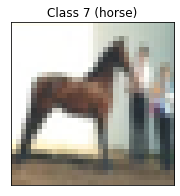

In [12]:
# insert code here
check_one(X_train, t_train.flatten())

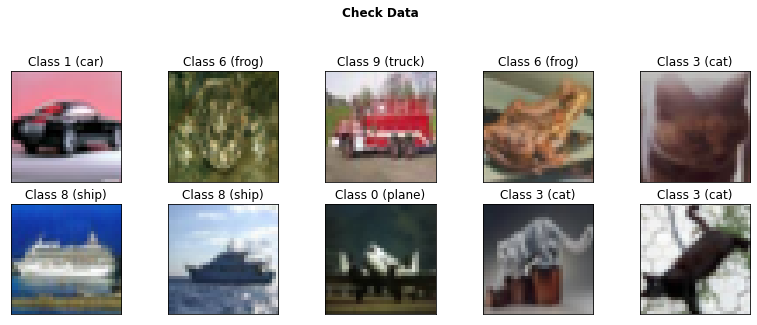

In [11]:
check_ten(X_train, t_train.flatten())

## Prepare data

In [13]:
# Prepare input data
_, img_rows, img_cols, img_channels = X_train.shape
num_classes = len(set(t_train.flatten()))

# Convert the target to categorical
y_train = to_categorical(
    t_train,
    num_classes = num_classes,
    dtype = 'uint8')
y_test = to_categorical(
    t_test,
    num_classes = num_classes,
    dtype = 'uint8')

# Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [14]:
# insert code here
model = Sequential()

In [15]:
model.add(Conv2D(48, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(Conv2D(48, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 48)        1344      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 48)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 96)        41568     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 96)        83040     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 96)          0

## Compile the model

In [17]:
# insert code here
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Fit the training data

In [ ]:
# Uncomment the statement below to allow online monitoring with TensorBoard
# tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

In [19]:
%%time
tensorboard = TensorBoard(log_dir = 'logs')

# Fit the model on a training set
fitted_model = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    # epochs = 100,
    epochs = 10,
    # batch_size = 100,
    batch_size = 10,
    callbacks = [tensorboard],
    verbose = 1)
print(f'Training accuracy:{fitted_model.history["accuracy"][-1]:.2f} validation accuracy:{fitted_model.history["val_accuracy"][-1]:.2f} ')

Epoch 1/10
4000/4000 [==============================] - 178s 45ms/step - loss: 1.8685 - accuracy: 0.2870 - val_loss: 1.7456 - val_accuracy: 0.3282
Epoch 2/10
4000/4000 [==============================] - 181s 45ms/step - loss: 1.8456 - accuracy: 0.3050 - val_loss: 1.8293 - val_accuracy: 0.3116
Epoch 3/10
4000/4000 [==============================] - 186s 46ms/step - loss: 1.8873 - accuracy: 0.2880 - val_loss: 1.8548 - val_accuracy: 0.3028
Epoch 4/10
4000/4000 [==============================] - 176s 44ms/step - loss: 1.8645 - accuracy: 0.2951 - val_loss: 1.8266 - val_accuracy: 0.3162
Epoch 5/10
4000/4000 [==============================] - 179s 45ms/step - loss: 1.8634 - accuracy: 0.2973 - val_loss: 1.9317 - val_accuracy: 0.2768
Epoch 6/10
4000/4000 [==============================] - 189s 47ms/step - loss: 1.8776 - accuracy: 0.2971 - val_loss: 1.8498 - val_accuracy: 0.2886
Epoch 7/10
4000/4000 [==============================] - 187s 47ms/step - loss: 1.8871 - accuracy: 0.2946 - val_loss: 1

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [21]:
# %load_ext tensorboard
# %tensorboard --logdir logs
tensorboard

# Create predictions

In [22]:
%%time
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Wall time: 6.42 s


# Evaluate the model

In [23]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

1000/1000 [==============================] - 10s 10ms/step - loss: 1.8634 - accuracy: 0.3067

Test loss: 1.863356, Test accuracy: 0.306700


In [24]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

In [25]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

   |   0   1   2   3   4   5   6   7   8   9 
---------------------------------------------
  0| 369   4 122  15  71   5  22  72 188 132 
  1|  46  53  15  30  20   3  44  39  78 672 
  2|  30   1  93  48 469  10 119 149  14  67 
  3|  13   0  24  91 360  13 179 243   6  71 
  4|  21   1  53  24 490   3 197 161  19  31 
  5|   5   0  27 106 417  17 133 224   8  63 
  6|   4   0  10  29 254   4 483 145   3  68 
  7|  12   0  21  28 264   6 112 434   9 114 
  8| 191  10  71  31  55   2  19  30 425 166 
  9|  56  23  17  34  37   4  40  72 105 612 


# Visualisation of cost

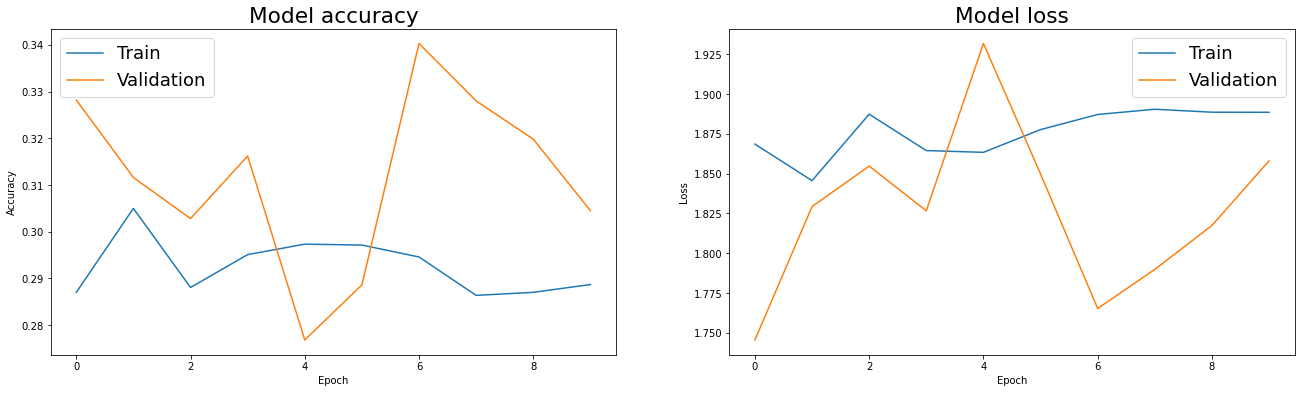

In [26]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(fitted_model.history['accuracy'])
ax[0].plot(fitted_model.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(fitted_model.history['loss'])
ax[1].plot(fitted_model.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

# Results

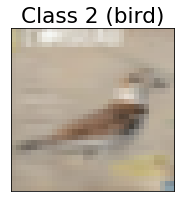

In [39]:
# insert code here
check_one(X_test, predictions, actual = y_test, compare = True)

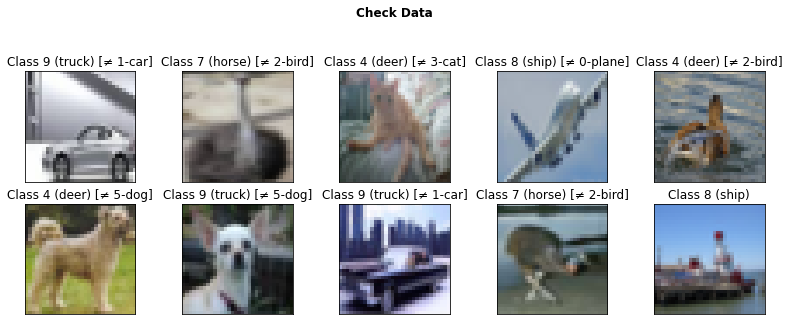

In [40]:
check_ten(X_test, predictions, y_test, True)


# Save and Load models and weights

## Save

In [41]:
# insert code here
# save model
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
# save weights
model.save_weights('model.h5')

## Load

In [42]:
# insert code here
# import the module to convert a json file to a model
from keras.models import model_from_json

In [43]:
# # create a new model
new_model = Sequential()

In [44]:
# load model
with open('model.json', 'r') as json_file:
    model_json = json_file.read()
new_model = model_from_json(model_json)

# load weights
new_model.load_weights('model.h5')

In [45]:
# compile the new model
new_model.compile(optimizer = 'adam', 
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])

© 2020 Institute of Data